<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Predicting shots made per game by Kobe Bryant

_Authors: Kiefer Katovich (SF)_

---

In this lab you'll be using regularized regression penalties Ridge, Lasso, and Elastic Net to try and predict how many shots Kobe Bryant made per game in his career.

The Kobe shots dataset has hundreds of columns representing different characteristics of each basketball game. Fitting an ordinary linear regression using every predictor would dramatically overfit the model considering the limited number of observations (games) we have available. Furthermore, many of the predictors have significant multicollinearity. 

**Warning:** Some of these calculations are computationally expensive and may take a while to execute.  It may be worth while to only use a portion of the data to perform these calculations, especially if you have experienced kernel issues in the past.

---

### 1. Load packages and data

In [15]:
import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
kobe = pd.read_csv('../data/kobe_superwide_games.csv')

---

### 2. Examine the data

- How many columns are there?
- Examine what the observations (rows) and columns represent.
- Why is this data that regularization might be particularly useful for?

In [10]:
# A:
kobe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Columns: 645 entries, SHOTS_MADE to CAREER_GAME_NUMBER
dtypes: float64(640), int64(5)
memory usage: 7.7 MB


In [11]:
kobe.head()

,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
2,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
3,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
4,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5


In [13]:
for col in kobe.columns:
    if 'jump' in col:
        print(col)

COMBINED_SHOT_TYPE:jump_shot
ACTION_TYPE:driving_floating_bank_jump_shot
ACTION_TYPE:driving_floating_jump_shot
ACTION_TYPE:driving_jump_shot
ACTION_TYPE:fadeaway_jump_shot
ACTION_TYPE:floating_jump_shot
ACTION_TYPE:jump_bank_shot
ACTION_TYPE:jump_hook_shot
ACTION_TYPE:jump_shot
ACTION_TYPE:pullup_jump_shot
ACTION_TYPE:running_jump_shot
ACTION_TYPE:running_pull-up_jump_shot
ACTION_TYPE:step_back_jump_shot
ACTION_TYPE:turnaround_fadeaway_bank_jump_shot
ACTION_TYPE:turnaround_jump_shot


---

### 3. Make predictor and target variables. Standardize the predictors.

Why is normalization necessary for regularized regressions?

Use the `sklearn.preprocessing` class `StandardScaler` to standardize the predictors.

In [14]:
# A:
y = kobe.SHOTS_MADE
X = kobe.drop('SHOTS_MADE', axis = 1)

In [16]:
from sklearn.preprocessing import StandardScaler

In [18]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train) 
X_test_scaled = ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [41]:
#standardize

In [42]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
lr.score(X_test_scaled, y_test)

-4.086219254227843e+26

In [44]:
lr.score(X_train_scaled, y_train)

0.8262487251432395

---

### 4. Build a linear regression predicting `SHOTS_MADE` from the rest of the columns.

Cross-validate the $R^2$ of an ordinary linear regression model with 10 cross-validation folds.

How does it perform?

In [45]:
# A:
cvs = cross_val_score(lr, X_train, y_train, cv = 10)

<BarContainer object of 10 artists>

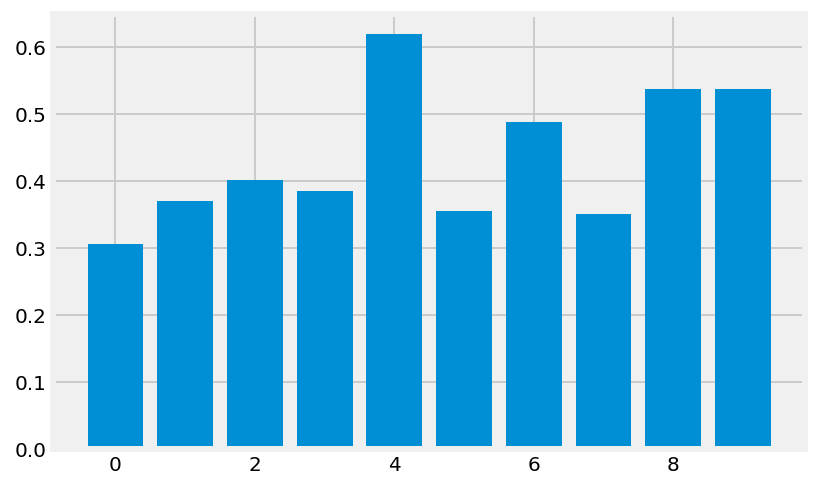

In [46]:
plt.bar([i for i in range(len(cvs))], cvs)

---

### 5. Find an optimal value for Ridge regression alpha using `RidgeCV`.

[Go to the documentation and read how RidgeCV works.](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

> *Hint: once the RidgeCV is fit, the attribute `.alpha_` contains the best alpha parameter it found through cross-validation.*

Recall that Ridge performs best searching alphas through logarithmic space (`np.logspace`). This may take awhile to fit!


In [47]:
# A:
ridgecv = RidgeCV(alphas = np.logspace(0, 10, 100))
ridgecv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000e+00, 1.26186e+00, ..., 7.92483e+09, 1.00000e+10]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [48]:
ridgecv.alpha_

1353.0477745798062

---

### 6. Cross-validate the Ridge regression $R^2$ with the optimal alpha.

Is it better than the Linear regression? If so, why might this be?

In [49]:
# A:
ridge = Ridge(alpha=ridgecv.alpha_)

In [50]:
rcvs = cross_val_score(ridge, X_train_scaled, y_train, cv = 10)

<BarContainer object of 10 artists>

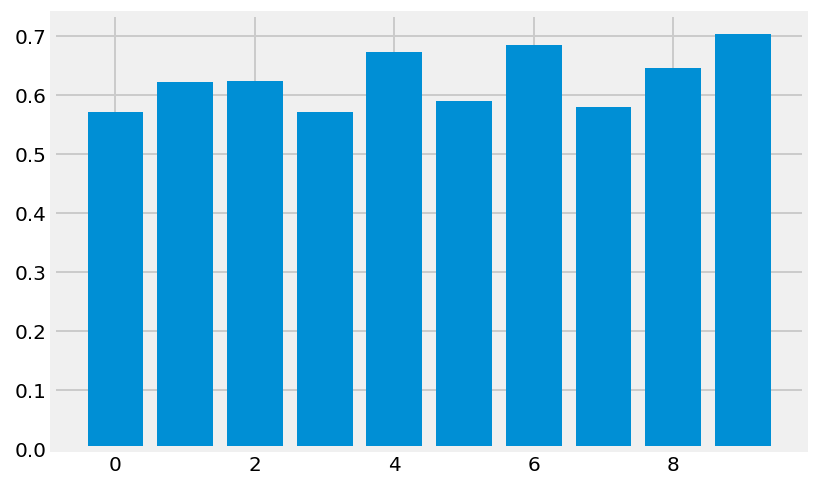

In [51]:
plt.bar([i for i in range(len(rcvs))], rcvs)

---

### 7. Find an optimal value for Lasso regression alpha using `LassoCV`.

[Go to the documentation and read how LassoCV works.](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) It is very similar to `RidgeCV`.

> *Hint: again, once the `LassoCV` is fit, the attribute `.alpha_` contains the best alpha parameter it found through cross-validation.*

Recall that Lasso, unlike Ridge, performs best searching for alpha through linear space (`np.linspace`). However, you can actually let the LassoCV decide itself what alphas to use by instead setting the keyword argument `n_alphas=` to however many alphas you want it to search over. It is recommended to let sklearn choose the range of alphas.

_**Tip:** If you find your CV taking a long time and you're not sure if its working set `verbose =1`._

In [52]:
# A:
lass_cv = LassoCV()
lass_cv.fit(X_train_scaled, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [53]:
lass_cv.alpha_

0.10073546575011778

---

### 8. Cross-validate the Lasso $R^2$ with the optimal alpha.

Is it better than the Linear regression? Is it better than Ridge? What do the differences in results imply about the issues with the dataset?

In [56]:
# A:
lasso = Lasso(lass_cv.alpha_)
lcvs = cross_val_score(lasso, X_train_scaled, y_train, cv = 10)

<BarContainer object of 10 artists>

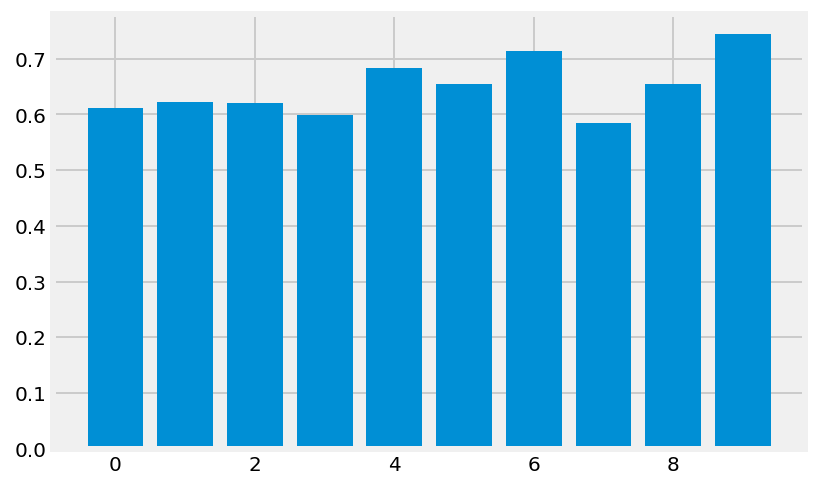

In [57]:
plt.bar([i for i in range(len(lcvs))], lcvs)

---

### 9. Look at the coefficients for variables in the Lasso.

1. Show the coefficient for variables, ordered from largest to smallest coefficient by absolute value.
2. What percent of the variables in the original dataset are "zeroed-out" by the lasso?
3. What are the most important predictors for how many shots Kobe made in a game?

> **Note:** if you only fit the Lasso within `cross_val_score`, you will have to refit it outside of that
function to pull out the coefficients.

In [58]:
# A:
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.10073546575011778, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
len(lasso.coef_)

644

In [63]:
count = 0
for coef in lasso.coef_:
    if coef > 0:
        print(coef)
        count += 1

0.04056534580690943
0.014487192923692091
0.037838070223904716
0.052771593116636144
0.008164535403353127
0.054885913294629954
0.007489213383794115
0.0029847078857606945
0.01424070170058708
0.07629098299646103
0.0017949733974419347
0.015918825599962414
0.029624319462447837
0.042830898654819184
0.03276938669981548
0.058106221821238646
0.007881417700613564
0.01956445989920814
0.09204283769427415
0.004045221478563815
0.08925053882055793
0.03584939094378153
0.02607714294502366
0.04084241622800862
0.005781584284441112
0.08556837813761264
0.0571961307128584
0.04904559500525754
0.19960018333505525
0.2714066094020523
0.1806553109452279
0.01995790509632029
0.05809367041530776
1.0988864680240065
0.09347572324351473
0.017487800080730094
0.25913556507375435
0.9213443369302855
0.1751718301194648
0.0826403687351132
0.01820782773356576
0.026522900841360858
0.02308469769598435
0.04389541677251526
0.03701176356086384


In [65]:
names = []
coefs = []
for name, coef in zip(X_train.columns, lasso.coef_):
    if coef > 0:
        print(name, coef)
        names.append(name)
        coefs.append(coef)
        

SEASON_OPPONENT:dal:2008-09 0.04056534580690943
SEASON_OPPONENT:dal:2012-13 0.014487192923692091
SEASON_OPPONENT:det:2009-10 0.037838070223904716
SEASON_OPPONENT:gsw:2001-02 0.052771593116636144
SEASON_OPPONENT:hou:2000-01 0.008164535403353127
SEASON_OPPONENT:hou:2015-16 0.054885913294629954
SEASON_OPPONENT:lac:1999-00 0.007489213383794115
SEASON_OPPONENT:lac:2003-04 0.0029847078857606945
SEASON_OPPONENT:mem:2001-02 0.01424070170058708
SEASON_OPPONENT:mem:2009-10 0.07629098299646103
SEASON_OPPONENT:njn:2011-12 0.0017949733974419347
SEASON_OPPONENT:nyk:2002-03 0.015918825599962414
SEASON_OPPONENT:nyk:2009-10 0.029624319462447837
SEASON_OPPONENT:phx:2007-08 0.042830898654819184
SEASON_OPPONENT:phx:2009-10 0.03276938669981548
SEASON_OPPONENT:phx:2011-12 0.058106221821238646
SEASON_OPPONENT:por:2002-03 0.007881417700613564
SEASON_OPPONENT:por:2006-07 0.01956445989920814
SEASON_OPPONENT:sac:1999-00 0.09204283769427415
SEASON_OPPONENT:sas:2007-08 0.004045221478563815
SEASON_OPPONENT:sea:2004

In [68]:
pd.DataFrame([names, coefs]).T.sort_values(1, ascending = False)

,0,1
33,SHOT_TYPE:2pt_field_goal,1.09889
37,COMBINED_SHOT_TYPE:jump_shot,0.921344
29,SHOT_ZONE_BASIC:restricted_area,0.271407
36,COMBINED_SHOT_TYPE:dunk,0.259136
28,SHOT_ZONE_RANGE:24+_ft.,0.1996
30,SHOT_ZONE_AREA:center(c),0.180655
38,SECONDS_REMAINING,0.175172
34,SHOT_TYPE:3pt_field_goal,0.0934757
18,SEASON_OPPONENT:sac:1999-00,0.0920428
20,SEASON_OPPONENT:sea:2004-05,0.0892505


---

### 10. Find an optimal value for Elastic Net regression alpha using `ElasticNetCV`.

[Go to the documentation and read how LassoCV works.](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization
- `l1_ratio`: amount of ridge vs. lasso (0 = all ridge, 1 = all lasso)
    
Do not include 0 in the search for `l1_ratio`: it will not allow it and break!

You can use `n_alphas` for the alpha parameters instead of setting your own values: highly recommended!

Also - be careful setting too many l1_ratios over cross-validation folds in your search. It can take a very long time if you choose too many combinations and for the most part there are diminishing returns in this data.

In [11]:
# A:

---

### 11. Cross-validate the ElasticNet $R^2$ with the optimal alpha and l1_ratio.

How does it compare to the Ridge and Lasso regularized regressions?

In [12]:
# A:

---

### 12. [Bonus] Compare the residuals for the Ridge and Lasso visually.


In [13]:
# A: Maybe a jointplot?